In [2]:
import pandas as pd
import requests
import openpyxl
from bs4 import BeautifulSoup

In [57]:
url = 'https://www.billboard.com/charts/billboard-200/'

headers = {"User-Agent": "Mozilla/5.0"}

page = requests.get(url, headers=headers)

soup = BeautifulSoup(page.content, 'html.parser')

songs = soup.find_all('div', class_='o-chart-results-list-row-container')

In [58]:
print(len(songs))

200


In [59]:
try:
    data = []
    
    for song in songs:

        labels = song.find_all('span', class_='c-label')
 
        album = song.find('h3', id='title-of-a-story').get_text(separator=" ").strip()
        album = " ".join(album.split())
        
        rank = labels[0].get_text(strip=True)

        weeks_on_chart = labels[-1].get_text(strip=True)

        artist= None
        for label in labels[1:]:
            text = label.get_text(strip=True).replace('\n',"").strip()
            if text.lower() not in ['new','re-entry']:
                artist = text
                break
            
        print(rank, album, artist, weeks_on_chart)
        data.append([rank, album, artist, weeks_on_chart])

    df=pd.DataFrame(data, columns=['Rank','Album','Artist','Weeks On Chart'])
    df.to_excel(r'C:\Users\Bhupal\BILLBOARD_TOP_200_SONGS.xlsx', index=False, engine='openpyxl')
    print('Exported successfully')

except Exception as e:
    print(f"Error: {e}")
    

1 MAYHEM Lady Gaga 1
2 GNX Kendrick Lamar 16
3 $ome $exy $ongs 4 U PARTYNEXTDOOR & Drake 4
4 SOS SZA 118
5 So Close To What Tate McRae 3
6 Short n' Sweet Sabrina Carpenter 29
7 Ruby JENNIE 1
8 Debi Tirar Mas Fotos Bad Bunny 10
9 One Thing At A Time Morgan Wallen 106
10 The Rise And Fall Of A Midwest Princess Chappell Roan 51
11 Hit Me Hard And Soft Billie Eilish 43
12 Hurry Up Tomorrow The Weeknd 6
13 Dangerous: The Double Album Morgan Wallen 218
14 The Secret Of Us Gracie Abrams 38
15 Alligator Bites Never Heal Doechii 15
16 The Tortured Poets Department Taylor Swift 47
17 Stick Season Noah Kahan 120
18 The Diamond Collection Post Malone 68
19 Mi Vida Mi Muerte Neton Vega 3
20 CHROMAKOPIA Tyler, The Creator 20
21 F-1 Trillion Post Malone 30
22 Take Care BigXthaPlug 22
23 DAMN. Kendrick Lamar 413
24 good kid, m.A.A.d city Kendrick Lamar 646
25 Peterson Tory Lanez 1
26 Tsunami Sea Spiritbox 1
27 Foxes In The Snow Jason Isbell 1
28 Fireworks & Rollerblades Benson Boone 49
29 More Leaks Y

In [60]:
df.head

<bound method NDFrame.head of     Rank                Album                 Artist Weeks On Chart
0      1               MAYHEM              Lady Gaga              1
1      2                  GNX         Kendrick Lamar             16
2      3  $ome $exy $ongs 4 U  PARTYNEXTDOOR & Drake              4
3      4                  SOS                    SZA            118
4      5     So Close To What             Tate McRae              3
..   ...                  ...                    ...            ...
195  196    House Of Balloons             The Weeknd              9
196  197        Cowboy Carter                Beyonce             42
197  198        Mixtape Pluto                 Future             25
198  199    Legends Never Die             Juice WRLD            230
199  200  Death Race For Love             Juice WRLD            287

[200 rows x 4 columns]>

In [61]:
Top_artists= df['Artist'].value_counts().head(10)

In [62]:
print(Top_artists)

Artist
Drake                 7
Taylor Swift          7
The Weeknd            5
Kendrick Lamar        5
Tyler, The Creator    4
Juice WRLD            4
Rod Wave              3
Zach Bryan            3
Luke Combs            3
Chris Stapleton       3
Name: count, dtype: int64


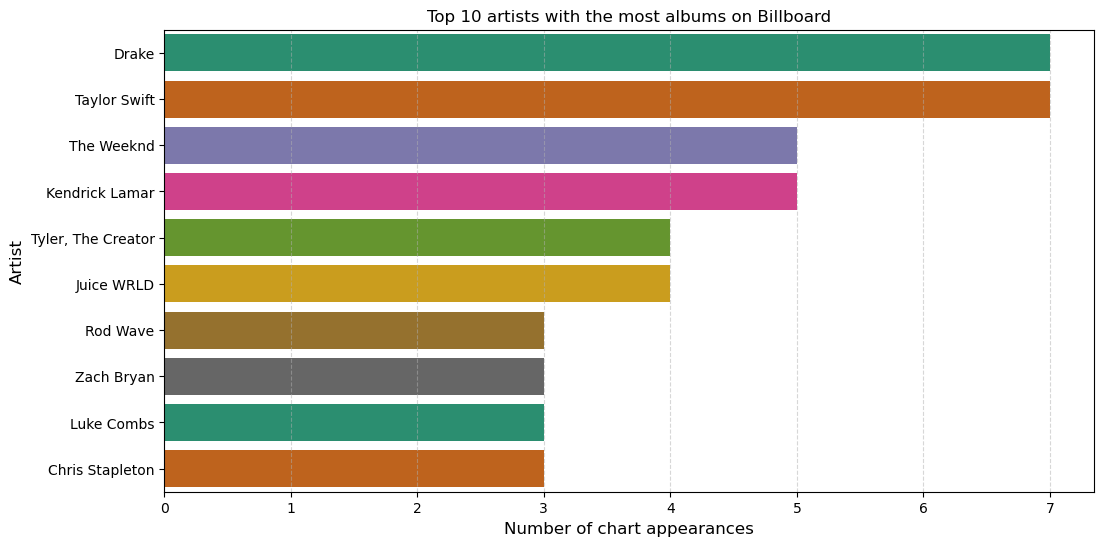

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=Top_artists.values, y=Top_artists.index, palette='Dark2')
plt.xlabel('Number of chart appearances', fontsize=12)
plt.ylabel('Artist', fontsize=12)
plt.title('Top 10 artists with the most albums on Billboard')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

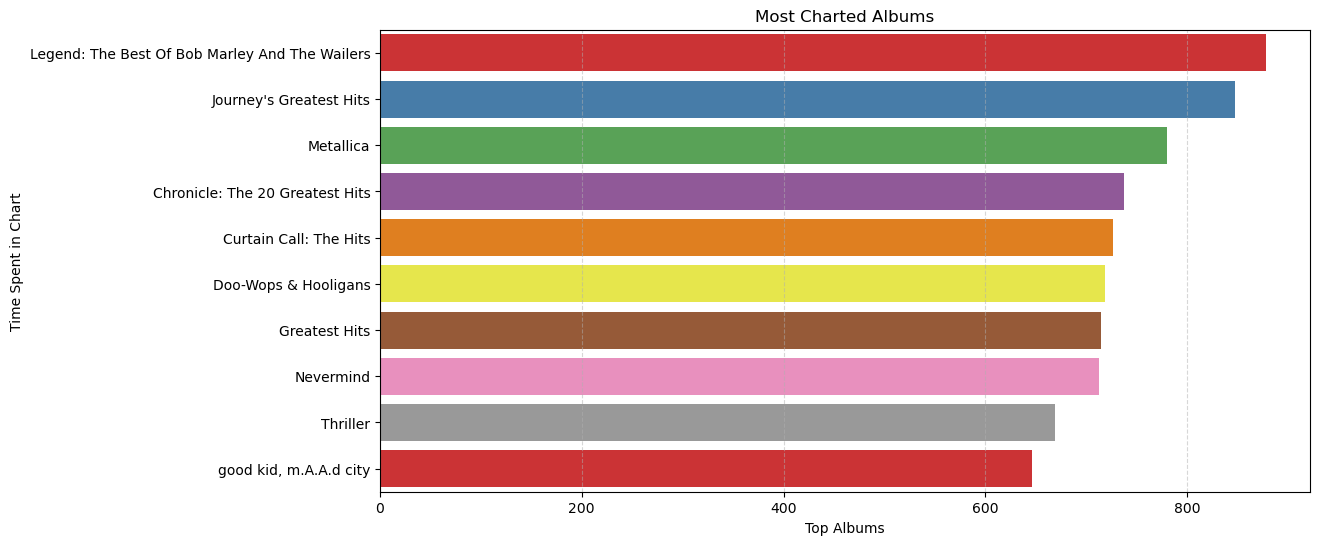

In [64]:
df['Weeks On Chart'] = pd.to_numeric(df['Weeks On Chart'], errors='coerce')
Top_albums=df.sort_values(by='Weeks On Chart', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x= 'Weeks On Chart', y='Album', data=Top_albums , palette='Set1')
plt.title('Most Charted Albums')
plt.xlabel('Top Albums')
plt.ylabel('Time Spent in Chart')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            200 non-null    object 
 1   Album           1 non-null      float64
 2   Artist          200 non-null    object 
 3   Weeks On Chart  200 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.4+ KB
